In [1]:
conda install scipy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


WARNING conda.exceptions:print_unexpected_error_report(1216): KeyError('pkgs_dirs')
Traceback (most recent call last):
  File "C:\Users\ayush\anaconda3\lib\site-packages\conda\exceptions.py", line 1082, in __call__
    return func(*args, **kwargs)
  File "C:\Users\ayush\anaconda3\lib\site-packages\conda\cli\main.py", line 87, in _main
    exit_code = do_call(args, p)
  File "C:\Users\ayush\anaconda3\lib\site-packages\conda\cli\conda_argparse.py", line 84, in do_call
    return getattr(module, func_name)(args, parser)
  File "C:\Users\ayush\anaconda3\lib\site-packages\conda\cli\main_install.py", line 20, in execute
    install(args, parser, 'install')
  File "C:\Users\ayush\anaconda3\lib\site-packages\conda\cli\install.py", line 260, in install
    unlink_link_transaction = solver.solve_for_transaction(
  File "C:\Users\ayush\anaconda3\lib\site-packages\conda\core\solve.py", line 152, in solve_for_transaction
    unlink_precs, link_precs = self.solve_for_diff(update_modifier, deps_modif

In [2]:
!pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [3]:
pip install mne --upgrade

Note: you may need to restart the kernel to use updated packages.


In [4]:
import mne
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from time import time
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils.multiclass import unique_labels

# import csv
# import pywt
# import pyedflib
# import numpy as np
# from spectrum import *
# from os import listdir
# from nitime import utils
# import scipy.stats as sp
# from os.path import isfile, join
# from nitime.viz import plot_tseries
# from matplotlib import pyplot as plt
# from nitime import algorithms as alg
# from nitime.timeseries import TimeSeries

from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
n=8
#1-KNN
from sklearn.neighbors import KNeighborsClassifier
#2-RandomForest
from sklearn.ensemble import RandomForestClassifier
#3-SVM
from sklearn import datasets, svm
#4-DecisionTree
from sklearn import tree
#5-LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#6-GaussianNB
from sklearn.naive_bayes import GaussianNB
#7-MLP
from sklearn.neural_network import MLPClassifier

In [5]:
path = r"data/nback1.vhdr"
marker = r"data/nback1.vmrk"

In [6]:
matplotlib.use('Qt5Agg')
# %matplotlib widget
%matplotlib qt
# %gui qt
# mne.viz.set_3d_backend("notebook")

In [7]:
fname= "channel_loc.csv"
# Read a montage from a file.
TUB_montage = mne.channels.read_custom_montage(fname)

In [8]:
# Reader for Brain Vision EEG file.
raw = mne.io.read_raw_brainvision(path, eog=('HEOG', 'VEOG'), preload=True)

Extracting parameters from data/nback1.vhdr...
Setting channel info structure...


C:\Users\ayush\AppData\Local\Temp\ipykernel_13920\269569590.py:2: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1000.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(path, eog=('HEOG', 'VEOG'), preload=True)


Reading 0 ... 701439  =      0.000 ...   701.439 secs...


In [9]:
# Set EEG channel positions and digitization points.
raw.set_montage(TUB_montage)
print(raw.set_montage)

<bound method set_montage of <RawBrainVision | nback1.eeg, 30 x 701440 (701.4 s), ~160.6 MB, data loaded>>


C:\Users\ayush\AppData\Local\Temp\ipykernel_13920\3371145509.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(TUB_montage)


In [10]:
raw.info
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, AFF5, AFz, F1, FC5, FC1, T7, C3, Cz, CP5, CP1, P7, P3, Pz, ...
 chs: 28 EEG, 2 EOG
 custom_ref_applied: False
 dig: 31 items (3 Cardinal, 28 EEG)
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2016-05-26 12:38:27 UTC
 nchan: 30
 projs: []
 sfreq: 1000.0 Hz
>


Using matplotlib as 2D backend.


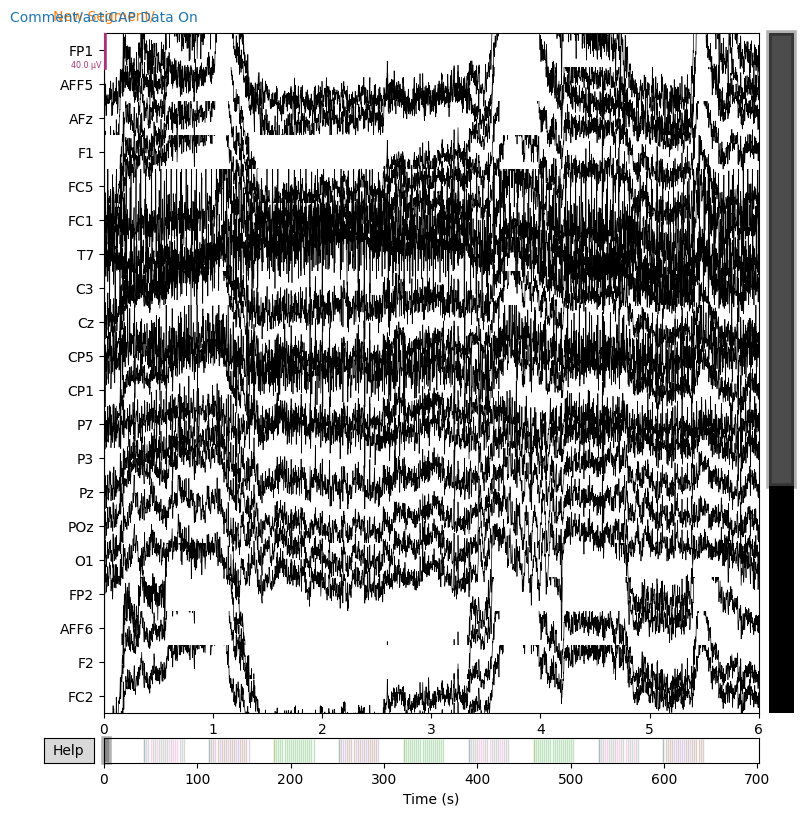

In [11]:
# Plotting raw data.
raw.plot(start=0, duration=6)

In [12]:
# read annotations from a file.
mrk = mne.read_annotations(marker, sfreq='auto', uint16_codec=None)
print(mrk)

Finding 'sfreq' from header file: C:\Users\ayush\Documents\GitHub\mental-health-workload\data\nback1.vhdr
<Annotations | 191 segments: Comment/actiCAP Data On (1), New Segment/ ...>


In [13]:
raw_filtered = raw.copy().filter(l_freq=0.1 , h_freq= 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.5s finished


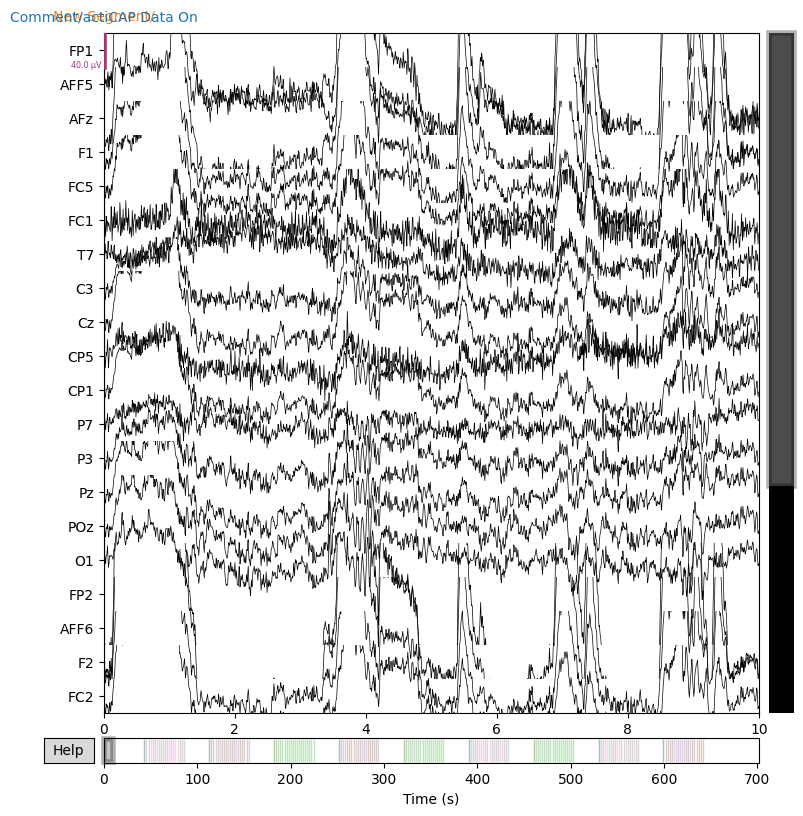

In [14]:
raw_filtered.plot()

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.8s finished


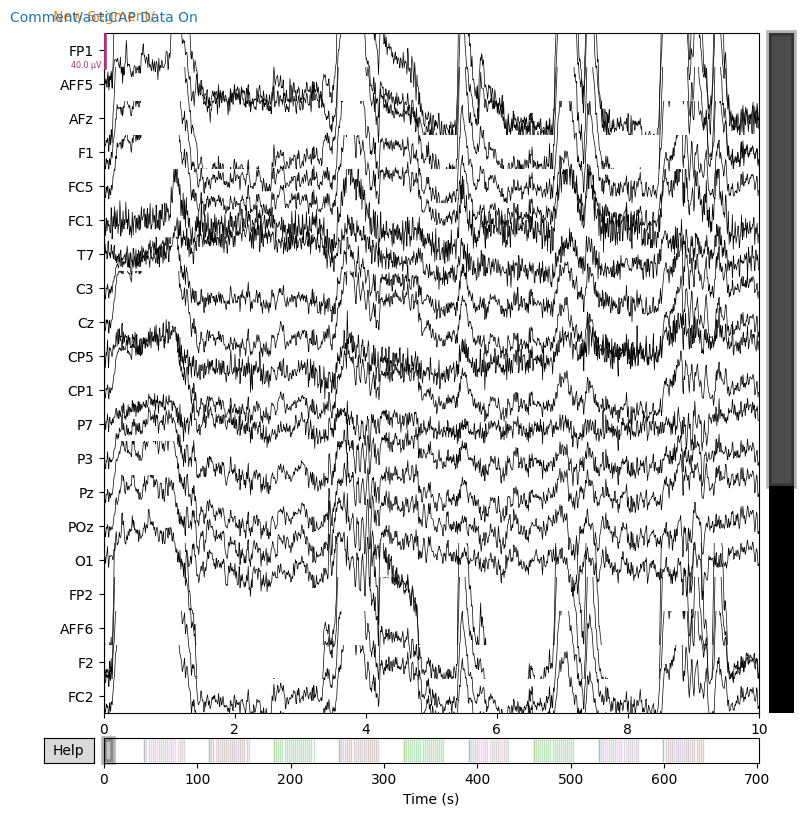

In [15]:
# Notch filter for the signal x.
# Applies a zero-phase notch filter to the signal x, operating on the last dimension.

raw_notch_filtered = raw_filtered.notch_filter(50, filter_length='auto', phase='zero')
raw_notch_filtered.plot()          
            

In [16]:
raw_re_referenced = mne.set_eeg_reference(raw_notch_filtered,ref_channels='average',copy=True, projection=False)
finData, times = raw_re_referenced[:]
print(finData)
print(times)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
<RawBrainVision | nback1.eeg, 30 x 701440 (701.4 s), ~160.6 MB, data loaded>
[-1.69406589e-21 -2.55789593e-07 -4.42551746e-07 ...  2.67111363e-06
  1.37934545e-06  2.00384503e-21]


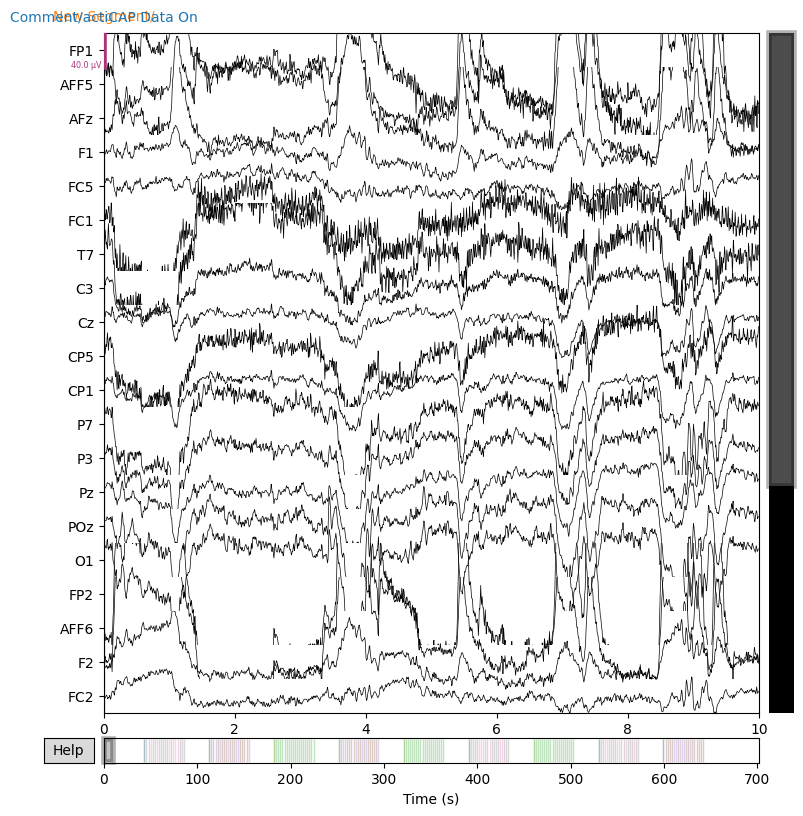

In [17]:
finData.plot()

In [66]:
fig, ax = plt.subplots(2)
print("fig")
print(fig)
print("ax")
print(ax)
raw.plot_psd(ax=ax[0], show = False, fmax = 60)
finData.plot_psd(ax=ax[1], show = False, fmax=60)
ax[0].set_title("PSD before filtering")
ax[1].set_title("PSD after filtering")
ax[1].set_xlabel('Frequency(Hz)')
fig.set_tight_layout(True)
plt.show()

fig
Figure(640x480)
ax
[<AxesSubplot: > <AxesSubplot: >]
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.256 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 0.256 (s)


C:\Users\ayush\AppData\Roaming\Python\Python39\site-packages\ipykernel\eventloops.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  event.canvas.draw()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:111: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  evoked_fig.canvas.draw()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  evoked_fig.canvas.draw()
C:\Users\ayush\anaconda3\lib\site-packages\mne\viz\evoked.py:165: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be inc

In [65]:
n_components = 10 #number of components you want to fit # can be either integer which typically implies number of channels - 1 (if applied average reference)
                  #if floating point number (0-1) fraction of total explained variance
method = 'fastica'
max_iter = 100
fit_params = dict(fastica_it = 5)
random_state = 42
ica = mne.preprocessing.ICA(n_components = n_components,
                        method = method,
                        max_iter=max_iter,
                        random_state= random_state
                        )
ica.fit(finData)

Fitting ICA to data using 27 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 4.6s.


<ICA | raw data decomposition, method: fastica (fit in 13 iterations on 701440 samples), 10 ICA components (27 PCA components available), channel types: eeg, no sources marked for exclusion>

In [54]:
finData.load_data()
ica.plot_sources(finData, show_scrollbars=False)
ica.plot_components(sphere=1)

Creating RawArray with float64 data, n_channels=12, n_times=701440
    Range : 0 ... 701439 =      0.000 ...   701.439 secs
Ready.


[<MNEFigure size 975x496 with 10 Axes>]

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components


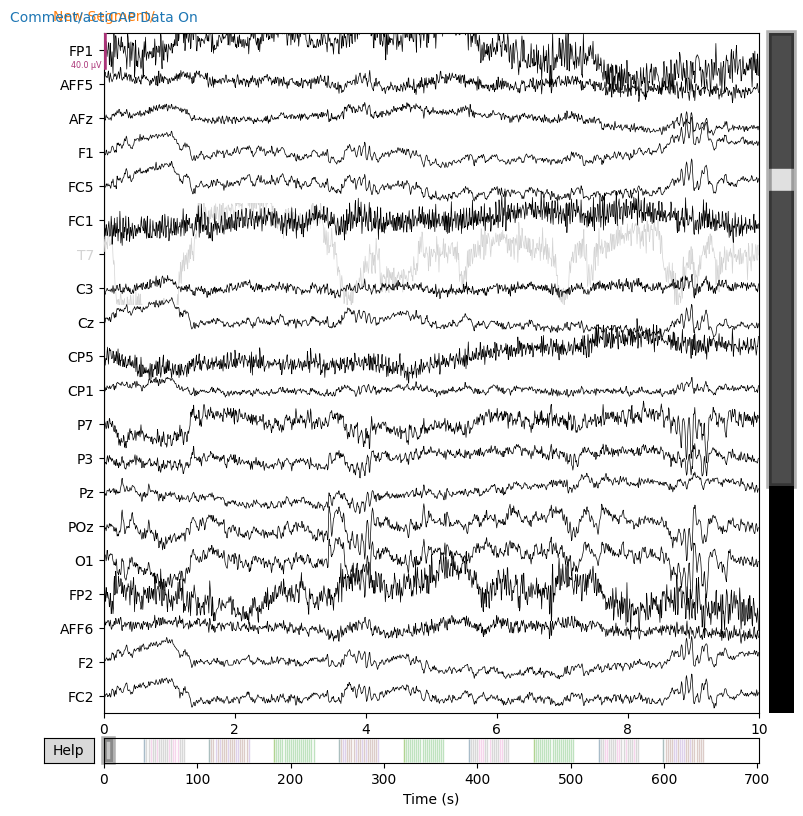

Channels marked as bad:
['T7']
Channels marked as bad:
none


In [55]:
#Manual Eye Artifact Removal
ica.exclude = [0, 3]  
reconst_raw = finData.copy()
ica.apply(reconst_raw)

finData.plot(title = "finData")
reconst_raw.plot(title = "Manual")

Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 2 ICA components
    Projecting back using 27 PCA components


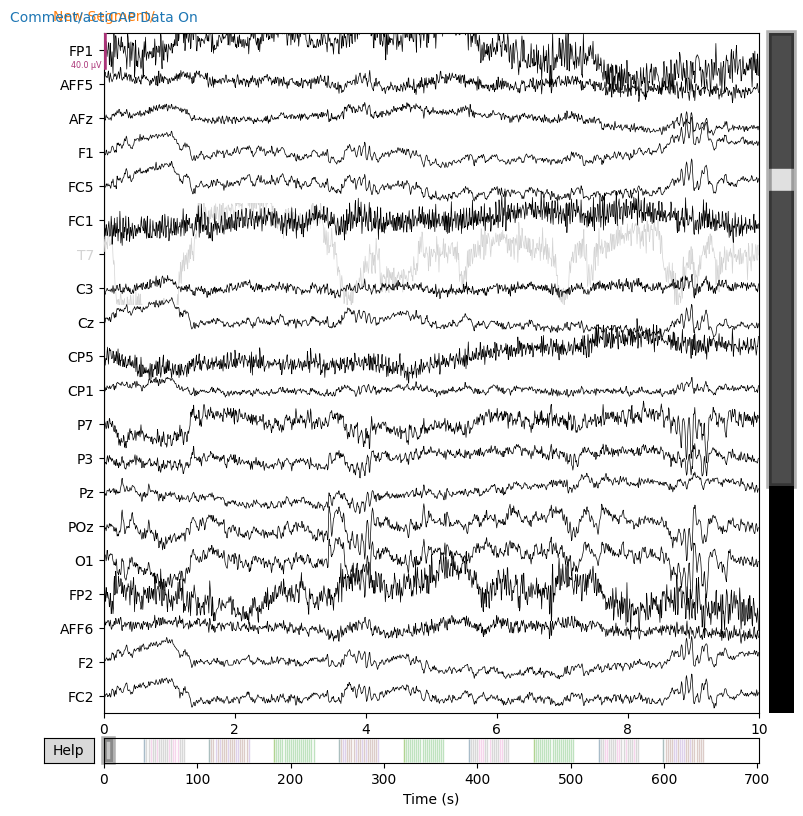

Channels marked as bad:
['T7']


In [64]:
#Automatic (Threshold Based) Eye Artifact Removal
ica.exclude = []
reconst_raw = finData.copy()
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(finData, threshold = 2.5)
ica.exclude = eog_indices
ica.apply(reconst_raw)

#print(eog_indices)

reconst_raw.plot(title="Automatic")





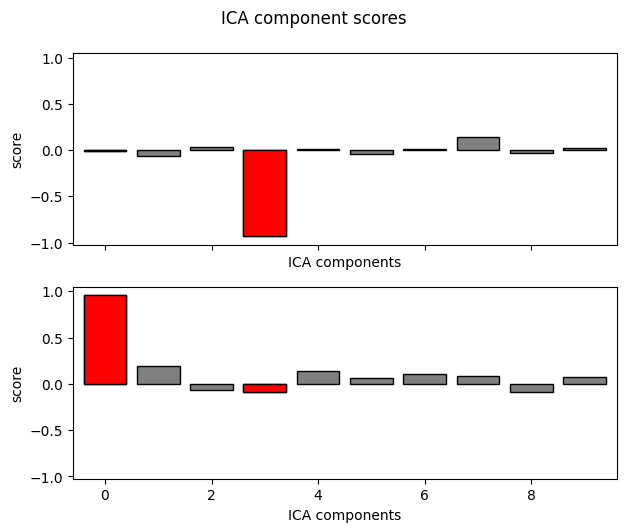

In [56]:
# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

In [62]:
# plot diagnostics
ica.plot_properties(finData, picks=eog_indices)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
350 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
350 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

Creating RawArray with float64 data, n_channels=12, n_times=701440
    Range : 0 ... 701439 =      0.000 ...   701.439 secs
Ready.


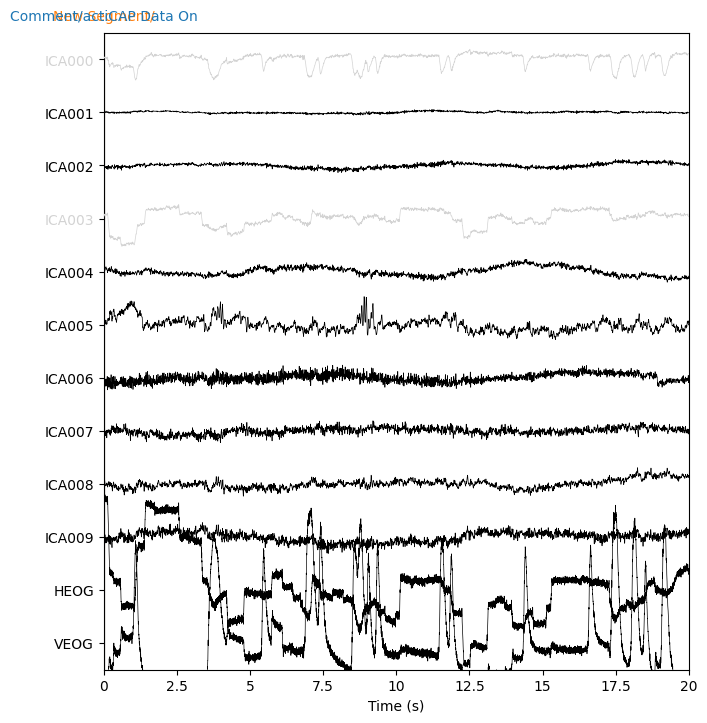

In [63]:
# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(finData, show_scrollbars=False)

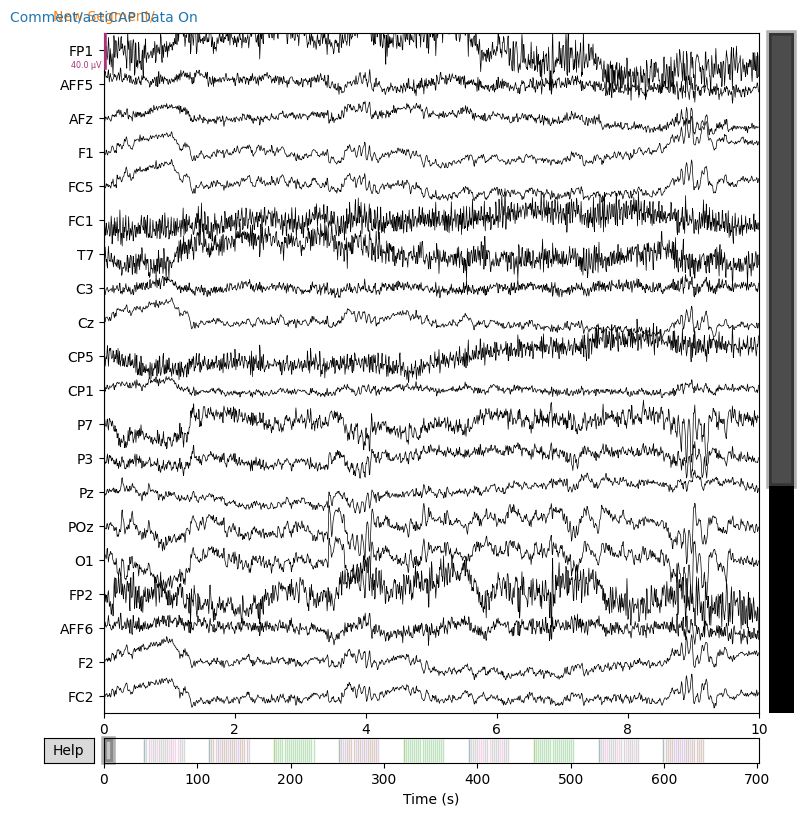

In [23]:
reconst_raw.plot()

In [24]:
events_ids = {
 'Stimulus/S 16': 16,
 'Stimulus/S 48': 48,
 'Stimulus/S 64': 64,
 'Stimulus/S 80': 80,
 'Stimulus/S 96': 96}
events_ids

{'Stimulus/S 16': 16,
 'Stimulus/S 48': 48,
 'Stimulus/S 64': 64,
 'Stimulus/S 80': 80,
 'Stimulus/S 96': 96}

In [25]:
event,event_ids = mne.events_from_annotations(reconst_raw, events_ids)

Used Annotations descriptions: ['Stimulus/S 16', 'Stimulus/S 48', 'Stimulus/S 64', 'Stimulus/S 80', 'Stimulus/S 96']


In [26]:
event_ids

{'Stimulus/S 16': 16,
 'Stimulus/S 48': 48,
 'Stimulus/S 64': 64,
 'Stimulus/S 80': 80,
 'Stimulus/S 96': 96}

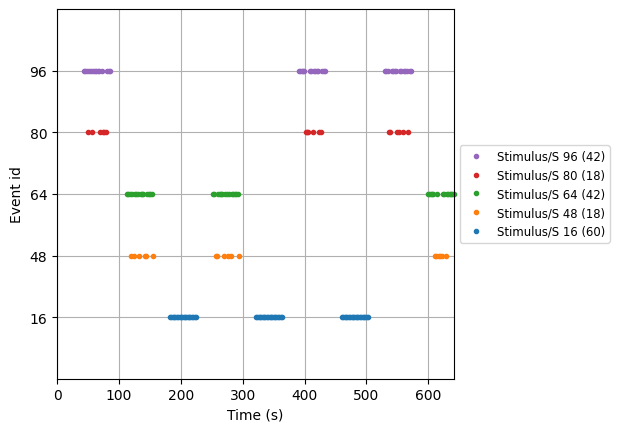

C:\Users\ayush\AppData\Roaming\Python\Python39\site-packages\ipykernel\eventloops.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()


In [27]:
mne.viz.plot_events(event,event_id = events_ids, sfreq=raw.info['sfreq'])

In [28]:
tmin=-0.3 # when does the epoch start relative to the event onset # 300ms before the start of the event
tmax=1.7  # when does the event end after the even onset # 500 ms from the start of the event

#Is a tuple containing the start of the baseline and end of the baseline
baseline= (None, 0) #None mean begnining of the event and 0 is the start of the event 

epochs = mne.Epochs(reconst_raw, 
                    events=event,
                    event_id=event_ids,
                    tmin=tmin,tmax=tmax, 
                    baseline=baseline,
                    preload=True,event_repeated = 'drop')



Not setting metadata
180 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 180 events and 2001 original time points ...
0 bad epochs dropped


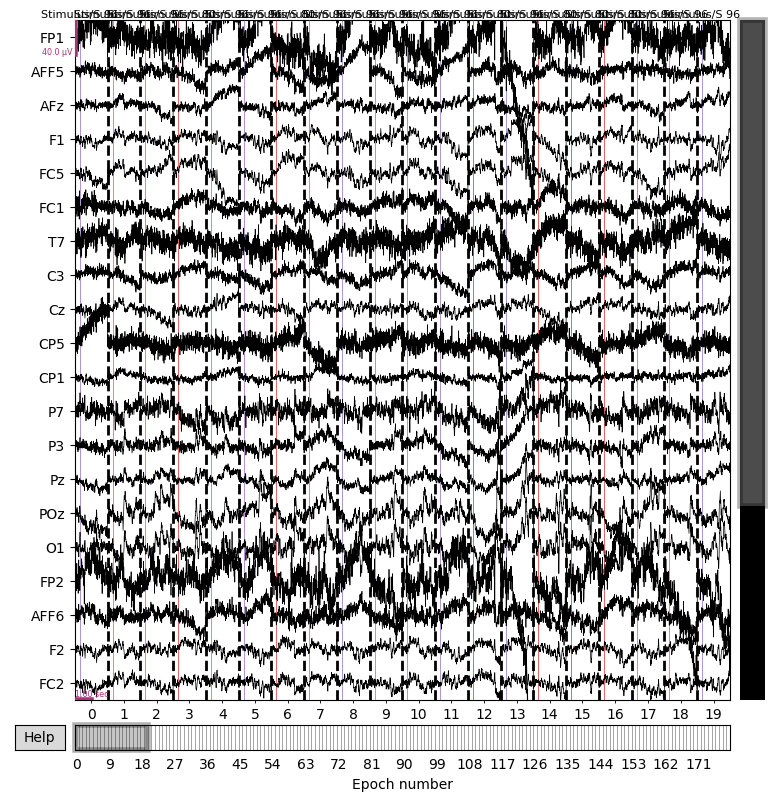

In [29]:
epochs.plot(events=event, event_id = event_ids)

Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated


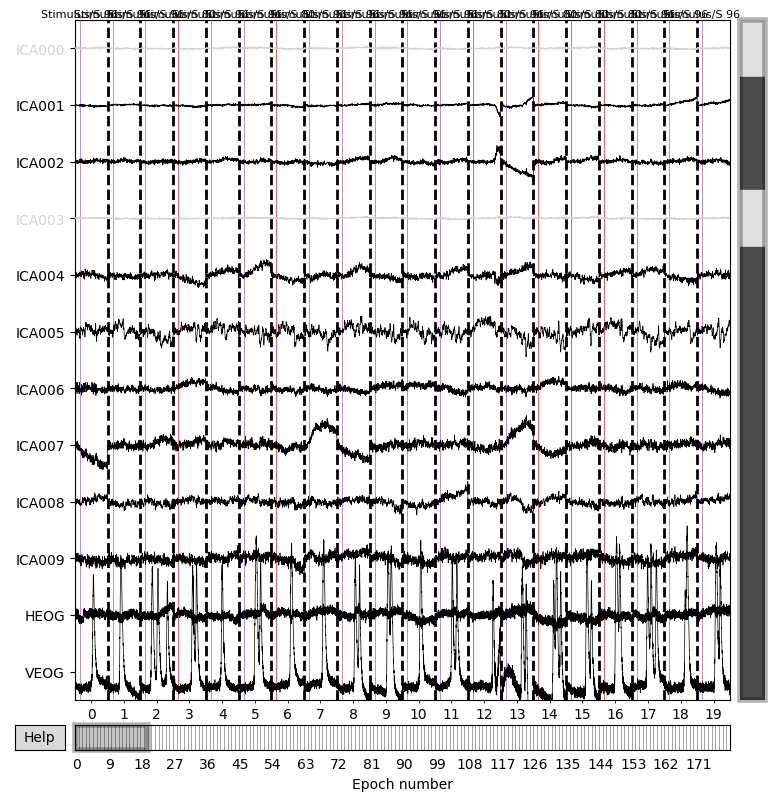

In [30]:
e3=event[:,-1]
print("e3")
print(e3)
print(len(e3))
e4 = np.repeat(e3,2001, axis=0)
print("e4")
print(e4)
print(len(e4))
e5 = np.reshape(e4,(180,2001))
print("e5")
print(e5)
print(len(e5))
print(len(e5[0]))

e3
[96 96 96 80 96 96 80 96 96 96 96 96 80 96 80 80 80 96 96 96 64 64 64 48
 64 48 64 64 64 48 64 64 64 48 48 64 64 64 64 48 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 64 64 48 48 64 64 64 64 48 64 64 48
 64 48 64 64 64 64 64 48 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 96 96 96 96 96 80 80 80 96 96 80 96 96 96 96 80 80 96 96 96
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 96 96 96 80
 80 96 96 96 96 80 80 96 96 80 96 96 96 80 96 96 64 64 64 64 64 48 48 64
 48 48 48 64 64 48 64 64 64 64 64 64]
180
e4
[96 96 96 ... 64 64 64]
360180
e5
[[96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 [96 96 96 ... 96 96 96]
 ...
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]
 [64 64 64 ... 64 64 64]]
180
2001


In [31]:
import numpy as np
j=0
dat = []
print(len(epochs))
print(len(epochs[0]))
print(len(epochs[0][0]))
print(epochs[0][0])
for i in epochs:
    dat.append(np.concatenate((i,e5[j].reshape(1,-1)),axis=0))
    j+=1
dat = np.array(dat)
print(dat)

180
1
1
<Epochs |  1 events (all good), -0.3 - 1.7 sec, baseline -0.3 – 0 sec, ~516 kB, data loaded,
 'Stimulus/S 96': 1>
[[[-1.28915751e-05 -1.14836883e-05 -9.92187214e-06 ...  9.11251034e-06
    6.22488271e-06  3.23445683e-06]
  [-4.06593760e-06 -4.61429293e-06 -5.23300597e-06 ... -9.59244805e-06
   -9.71021588e-06 -9.65863871e-06]
  [-2.72204611e-06 -2.95449601e-06 -3.23777546e-06 ...  2.64855983e-06
    2.79054869e-06  2.87657049e-06]
  ...
  [ 1.93435216e-05  2.55435216e-05  2.69435216e-05 ...  7.44352159e-06
    1.35435216e-05  1.36435216e-05]
  [ 1.85382060e-05  1.87382060e-05  1.92382060e-05 ...  1.04382060e-05
   -3.16179402e-06 -5.56179402e-06]
  [ 9.60000000e+01  9.60000000e+01  9.60000000e+01 ...  9.60000000e+01
    9.60000000e+01  9.60000000e+01]]

 [[-2.01207541e-05 -2.15499215e-05 -2.24624144e-05 ...  1.16841158e-05
    1.17625378e-05  1.11964551e-05]
  [ 7.09660301e-07  9.91899474e-07  1.05887569e-06 ... -6.44351446e-06
   -6.11930934e-06 -5.86021750e-06]
  [ 1.07884580

In [32]:
dat.shape  #trials, channel, length

(180, 31, 2001)

# Featue Extraction Starts


# Statistical Features

In [33]:
from scipy import stats
def mean(data):
    print("data")
    print(data)
    print("mean")
    print(np.mean(data,axis=0))
    return np.mean(data,axis=0)
def std(data):
    return np.std(data,axis=0)
def ptp(data):
    return np.ptp(data,axis=0)
def var(data):
        return np.var(data,axis=0)
def minim(data):
      return np.min(data,axis=0)
def maxim(data):
      return np.max(data,axis=0)
def argminim(data):
      return np.argmin(data,axis=0)
def argmaxim(data):
      return np.argmax(data,axis=0)
def mean_square(data):
      return np.mean(data**2,axis=0)
def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  
def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)
def skewness(data):
    return stats.skew(data,axis=0)
def kurtosis(data):
    return stats.kurtosis(data,axis=0)

# Period Features

In [34]:
# Coefficient of variation 

def coeff_var(a):
    print("Aa")
    print(a)
    b = a #Extracting the data from the 14 channels
    output = np.zeros(len(b)) #Initializing the output array with zeros
    k = 0; #For counting the current row no.
    for i in b:
        mean_i = np.mean(i,axis=-1) #Saving the mean of array i
        std_i = np.std(i,axis=-1) #Saving the standard deviation of array i
        output[k] = std_i/mean_i #computing coefficient of variation
        k=k+1
    return np.sum(output,axis=-1)/31


In [40]:
import csv
from tqdm import tqdm_notebook

names = ["Mean","Standard Deviation","Data Type","Variance","Minima","Maxima","Arg Minima","Arg Maxima","Mean Square","Root Mean Square", "Abs Diff", "Skewness","kurtosis"]
def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),mean_square(data),rms(data),abs_diffs_signal(data),skewness(data),kurtosis(data)),axis=0)

csvfile = r'features.csv'

with open(csvfile, "a") as output:
    writer = csv.writer(output,lineterminator='\n')
    writer.writerow(names)
    features=[]
    for data in tqdm_notebook(dat):
#         print(mean(data))
#         print(len(mean(data)))
#         print(sum(mean(data)))
#         print((sum(mean(data)))/2001)
#         print(len(dat))
        features.append(concatenate_features(data))
# features.append(coeff_var(dat))
    features=np.array(features)
    print(features)
    writer.writerows(features) 
    features.shape

C:\Users\ayush\AppData\Local\Temp\ipykernel_13920\17553683.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for data in tqdm_notebook(dat):


  0%|          | 0/180 [00:00<?, ?it/s]

data
[[-1.28915751e-05 -1.14836883e-05 -9.92187214e-06 ...  9.11251034e-06
   6.22488271e-06  3.23445683e-06]
 [-4.06593760e-06 -4.61429293e-06 -5.23300597e-06 ... -9.59244805e-06
  -9.71021588e-06 -9.65863871e-06]
 [-2.72204611e-06 -2.95449601e-06 -3.23777546e-06 ...  2.64855983e-06
   2.79054869e-06  2.87657049e-06]
 ...
 [ 1.93435216e-05  2.55435216e-05  2.69435216e-05 ...  7.44352159e-06
   1.35435216e-05  1.36435216e-05]
 [ 1.85382060e-05  1.87382060e-05  1.92382060e-05 ...  1.04382060e-05
  -3.16179402e-06 -5.56179402e-06]
 [ 9.60000000e+01  9.60000000e+01  9.60000000e+01 ...  9.60000000e+01
   9.60000000e+01  9.60000000e+01]]
mean
[3.09677542 3.09677562 3.09677568 ... 3.09677477 3.09677453 3.09677445]
data
[[-2.01207541e-05 -2.15499215e-05 -2.24624144e-05 ...  1.16841158e-05
   1.17625378e-05  1.11964551e-05]
 [ 7.09660301e-07  9.91899474e-07  1.05887569e-06 ... -6.44351446e-06
  -6.11930934e-06 -5.86021750e-06]
 [ 1.07884580e-06  9.88940758e-07  9.38076810e-07 ...  3.73035040e-

data
[[ 1.25469897e-05  1.59088341e-05  1.87341652e-05 ...  1.46791613e-05
   1.47508959e-05  1.51747671e-05]
 [ 5.68217446e-06  6.12701702e-06  6.45824392e-06 ... -1.39344818e-05
  -1.36139858e-05 -1.33197781e-05]
 [ 2.38536898e-06  2.37424797e-06  2.33750067e-06 ...  9.90408043e-06
   9.80361648e-06  9.46667119e-06]
 ...
 [-1.68302326e-05 -4.14302326e-05 -3.00302326e-05 ... -2.35302326e-05
  -2.47302326e-05 -2.92302326e-05]
 [-9.72425249e-06 -4.62425249e-06  3.07574751e-06 ... -2.34242525e-05
  -1.54242525e-05 -9.62425249e-06]
 [ 1.60000000e+01  1.60000000e+01  1.60000000e+01 ...  1.60000000e+01
   1.60000000e+01  1.60000000e+01]]
mean
[0.51612818 0.51612755 0.51612816 ... 0.51612752 0.51612774 0.51612778]
data
[[-1.01322885e-05 -9.34139636e-06 -7.99336368e-06 ... -4.41885376e-05
  -4.50331241e-05 -4.54906457e-05]
 [-1.15251497e-05 -1.07166419e-05 -9.61050282e-06 ... -1.32936232e-05
  -1.35365751e-05 -1.40327395e-05]
 [-7.31982254e-07 -1.87260840e-07  3.12252452e-07 ...  1.12439531e-

data
[[-2.91369384e-05 -3.25324669e-05 -3.54320563e-05 ... -3.00031633e-06
  -4.14013513e-06 -5.14424502e-06]
 [ 1.44135872e-06  9.13154007e-07  3.21353174e-07 ...  8.25036454e-06
   7.61963353e-06  7.02200903e-06]
 [ 2.03432226e-06  2.39394400e-06  2.74675026e-06 ... -2.43263515e-06
  -2.35999641e-06 -2.34361979e-06]
 ...
 [ 5.21362126e-06  1.13621262e-07 -5.28637874e-06 ...  1.59136213e-05
   1.22136213e-05  8.81362126e-06]
 [-3.35774086e-05 -4.00774086e-05 -3.82774086e-05 ... -3.96774086e-05
  -4.25774086e-05 -3.12774086e-05]
 [ 9.60000000e+01  9.60000000e+01  9.60000000e+01 ...  9.60000000e+01
   9.60000000e+01  9.60000000e+01]]
mean
[3.09677328 3.0967729  3.09677279 ... 3.09677343 3.09677321 3.09677347]
data
[[-1.73302485e-07 -1.57306119e-06 -2.81909137e-06 ... -3.68973925e-05
  -3.82826342e-05 -3.88265753e-05]
 [-4.41556246e-06 -5.76808406e-06 -6.86758511e-06 ... -5.38460480e-06
  -5.26901566e-06 -5.02823521e-06]
 [ 1.60515108e-06  1.39089760e-06  1.18910723e-06 ... -8.88481152e-

data
[[-1.97480710e-05 -2.11582317e-05 -2.15819262e-05 ...  2.64438302e-05
   2.52766435e-05  2.41163013e-05]
 [ 6.03145803e-06  5.72956563e-06  5.18003818e-06 ...  1.43231767e-06
   1.33585556e-06  1.31340841e-06]
 [-5.51710060e-06 -5.70442072e-06 -5.65645274e-06 ... -2.22919259e-06
  -2.85863475e-06 -3.56421124e-06]
 ...
 [ 5.97674419e-06  1.54767442e-05  1.85767442e-05 ...  7.57674419e-06
  -2.12325581e-06 -3.82325581e-06]
 [ 1.99285714e-05  2.04285714e-05  1.69285714e-05 ... -1.38714286e-05
  -5.37142857e-06  4.02857143e-06]
 [ 9.60000000e+01  9.60000000e+01  9.60000000e+01 ...  9.60000000e+01
   9.60000000e+01  9.60000000e+01]]
mean
[3.09677503 3.09677535 3.09677534 ... 3.09677399 3.09677395 3.0967742 ]
data
[[ 9.48660751e-06  1.03839085e-05  1.05665468e-05 ... -1.05671983e-05
  -1.09952976e-05 -1.16430367e-05]
 [-8.89178694e-06 -8.87091476e-06 -8.51396264e-06 ... -3.91495286e-07
  -4.22683307e-07 -5.51129831e-07]
 [ 1.96493220e-06  1.35642121e-06  6.73867292e-07 ... -1.15079007e-

# Coherence

In [ ]:
time1=np.arange(180, 31, 2001)
cossignal1= np.cos(time1)
 
plt.plot(cossignal1)
plt.title("Signal 1")
plt.show()

In [ ]:
# signal 2
time2=np.arange(0,100,0.1)
cossignal2= np.cos(time2)
 
plt.plot(cossignal2)
plt.title("Signal 2")
plt.show()

In [ ]:
# Store the value of correlation in a
# variable say 'cor' using the following code:
cor=plt.cohere(cossignal1,cossignal2)
 
 
# plot the coherence graph
plt.show()

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

NameError: name 'hilphase' is not defined